In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

Load the datasets 

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Image in form of pixels/matrix :

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

we can also see the data in visual form 

In [7]:
import matplotlib.pyplot as plt
def show_image(image,labels,num):
    plt.figure(figsize=(12,12))
    for i in range(num):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image[i],cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()
    return

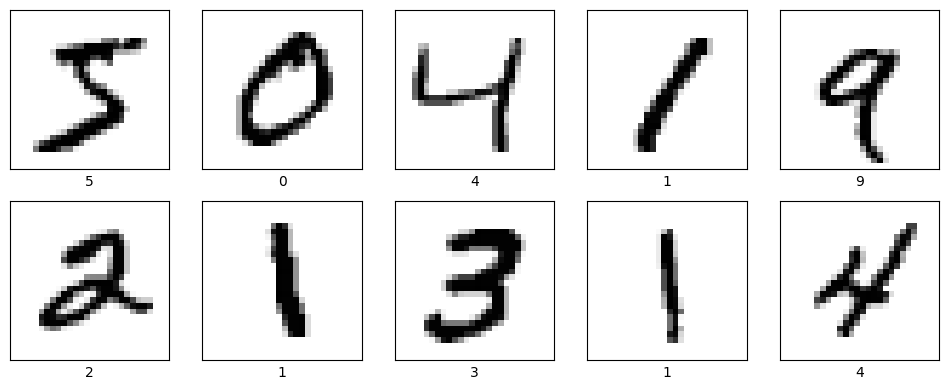

In [8]:
show_image(X_train,y_train,10)

### Data Preprocessing 

In [9]:
X_train=X_train.reshape(-1,28*28,1).astype('float32')/255.0
X_test=X_test.reshape(-1,28*28,1).astype('float32')/255.0



### Defining the model 

In [ ]:
model=models.Sequential(    
    [
    # hidden layer 1
    layers.Dense(64,activation='relu',input_shape=(28*28,)),
    # hidden layer 2
    layers.Dense(32,activation='relu'),
    # output layer
    layers.Dense(10,activation='softmax'),
    ]
    )

Compile the model 

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Train the model

In [15]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9032 - loss: 0.3440
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9536 - loss: 0.1559
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9660 - loss: 0.1139
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9728 - loss: 0.0901
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9769 - loss: 0.0751
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9804 - loss: 0.0632
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9829 - loss: 0.0547
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9849 - loss: 0.0478
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9868 - loss: 0.0416
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9879 - loss: 0.0359


In [16]:
test_loss,test_acc=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0916


Model Predictions 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


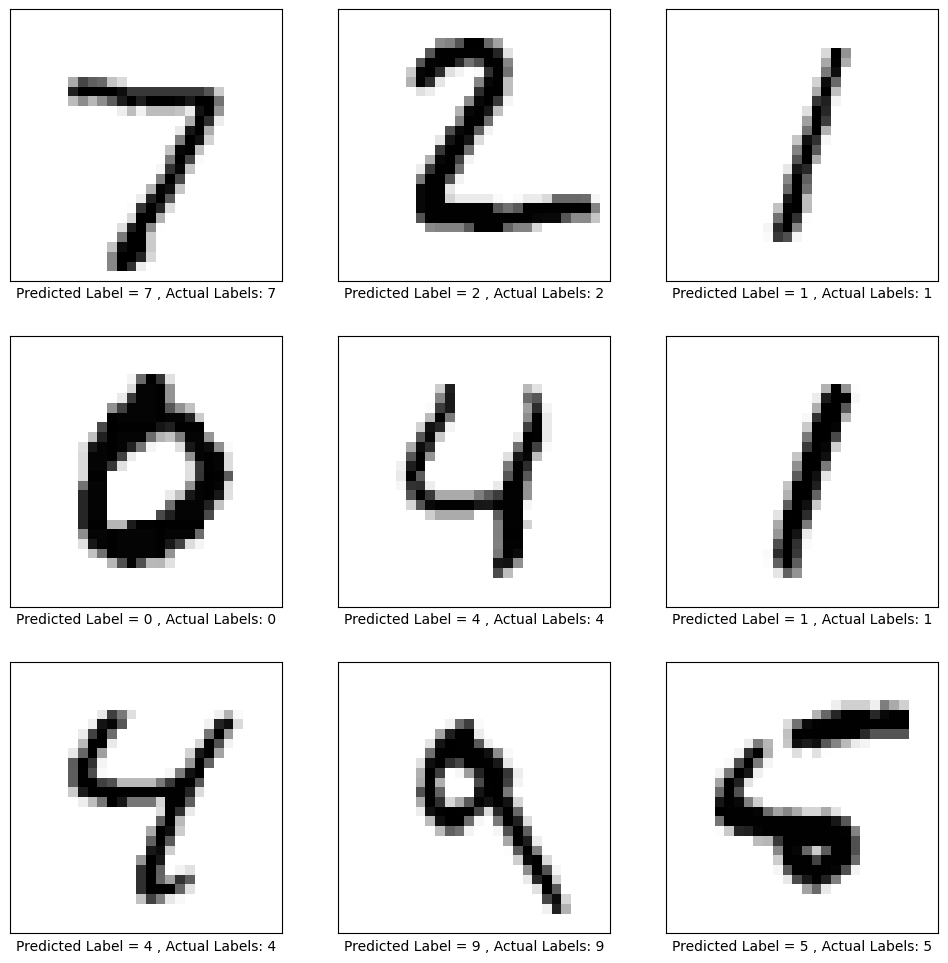

In [18]:
import numpy as np
preditcions=model.predict(X_test[:9]) #predict 9 images
predicted_labels=np.argmax(preditcions,axis=1)

plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(f"Predicted Label = {predicted_labels[i]} , Actual Labels: {y_test[i]}")
plt.show(
    
)

Task : Create your own set of samples and test that image with this model . 

Save the model

In [19]:
model.save('mnist_model.h5')

For future testign we can use this model directly 


In [20]:
from tensorflow.keras.models import load_model  

new_model=load_model('mnist_model.h5')
new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,652 (205.68 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)